In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



In [4]:
def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data points."""
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids, max_capacity):
    """Assign data points to the nearest centroid while respecting max capacity."""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    cluster_assignments = np.full(data.shape[0], -1, dtype=int) # -1 indicates unassigned
    cluster_sizes = np.zeros(centroids.shape[0], dtype=int)
    
    for i in range(data.shape[0]):
        for idx in np.argsort(distances[:, i]):
            if cluster_sizes[idx] < max_capacity:
                cluster_assignments[i] = idx
                cluster_sizes[idx] += 1
                break
    return cluster_assignments

def update_centroids(data, assignments, k):
    """Recalculate centroids as the mean of assigned data points."""
    centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means_with_capacity(data, k, max_capacity, max_iters=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        assignments = assign_clusters(data, centroids, max_capacity)
        new_centroids = update_centroids(data, assignments, k)
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return assignments, centroids

In [5]:
# Example usage
data = np.random.rand(100, 10) # 100 data points in 2D space
k = 4  # Number of clusters
max_capacity =26  # Maximum number of data points per cluster
max_iters = 200
assignments, centroids = k_means_with_capacity(data, k, max_capacity, max_iters)
print(assignments)

[1 3 1 1 0 0 3 1 0 1 2 2 1 0 1 3 3 2 3 2 1 3 2 0 1 0 3 1 0 2 3 2 2 0 1 2 3
 2 1 1 2 3 2 1 3 1 3 0 3 2 1 0 1 0 3 0 2 2 3 2 1 3 2 3 3 3 0 3 1 1 1 2 3 2
 1 2 2 1 0 1 0 3 1 0 2 1 2 0 0 2 0 3 2 0 0 2 3 3 0 3]


In [6]:
print(np.sum(assignments==0))
print(np.sum(assignments==1))
print(np.sum(assignments==2))
print(np.sum(assignments==3))

22
26
26
26


In [7]:
#split cora data into 28 clusters. each cluster has 100 nodes at most
cora_data = np.load('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/all_data/all_embs.npy')
cora_lables = np.load('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/all_data/all_ps_labels.npy')


In [8]:
k = 27
max_capacity =101
max_iters = 200
cora_assignments, cora_centroids = k_means_with_capacity(cora_data, k, max_capacity, max_iters)

In [13]:
np.unique(cora_assignments, return_counts=True)
np.save('/home/local/ASUAD/changyu2/generate_graph_embbedding/gcl_embeddings/cora/all_data/all_ps_cluster_kmeans.npy', cora_assignments)

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(cora_data)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2708 samples in 0.001s...
[t-SNE] Computed neighbors for 2708 samples in 0.323s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2708
[t-SNE] Computed conditional probabilities for sample 2000 / 2708
[t-SNE] Computed conditional probabilities for sample 2708 / 2708
[t-SNE] Mean sigma: 0.068750
[t-SNE] KL divergence after 150 iterations with early exaggeration: 65.906075
[t-SNE] KL divergence after 1000 iterations: 0.909504


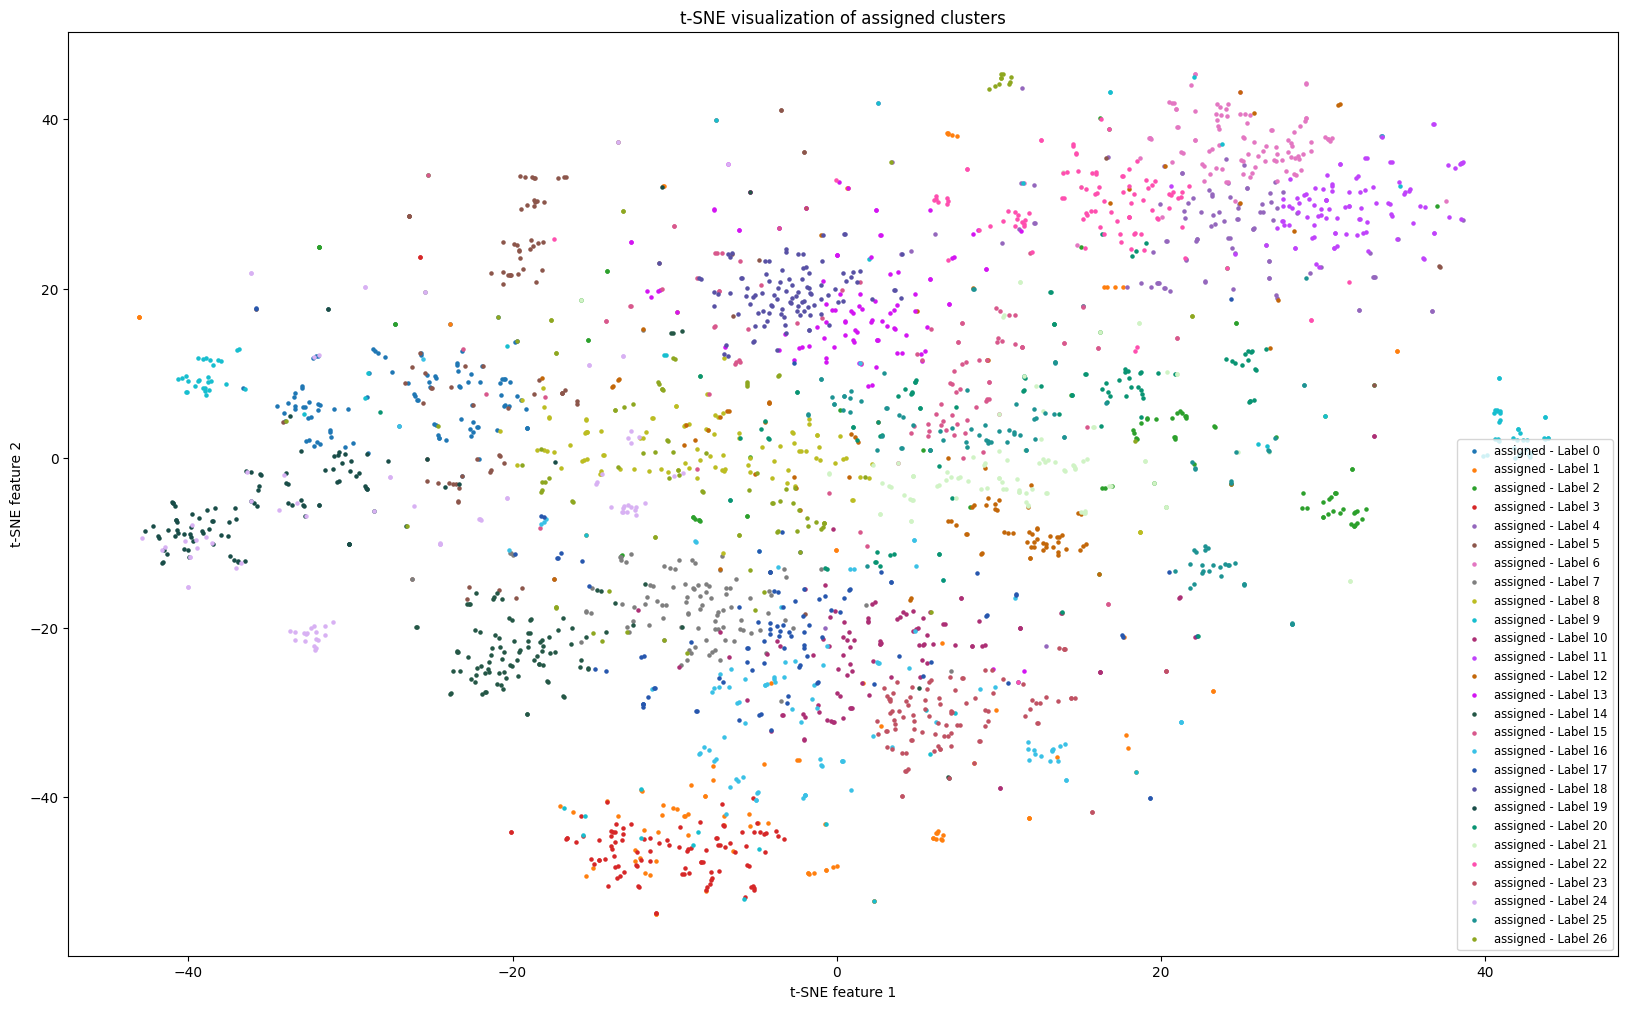

In [12]:
plt.figure(figsize=(20, 12))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
'#ac2f75',
'#c043fb',
'#c36709',
'#d315f2',
'#245746',
'#d8588c',
'#3ac1e6',
'#2757ae',
'#5851a5',
'#194d48',
'#099473',
'#d0f3c5',
'#fe4faf',
'#c05263',
'#d8b1f3',
'#1d9393',
'#8ea720',
'#c109b9',
'#7f201f',
'#caf497',]

unique_labels = np.unique(cora_assignments)  # Get all unique assigned labels

for i in unique_labels:  # Iterate through each unique label
    # Plot real data
    plt.scatter(tsne_results[cora_assignments == i, 0], tsne_results[cora_assignments == i, 1], 
                color=colors[i % len(colors)], label=f'assigned - Label {i}', s=5)



plt.legend(fontsize='small')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of assigned clusters')
plt.show()

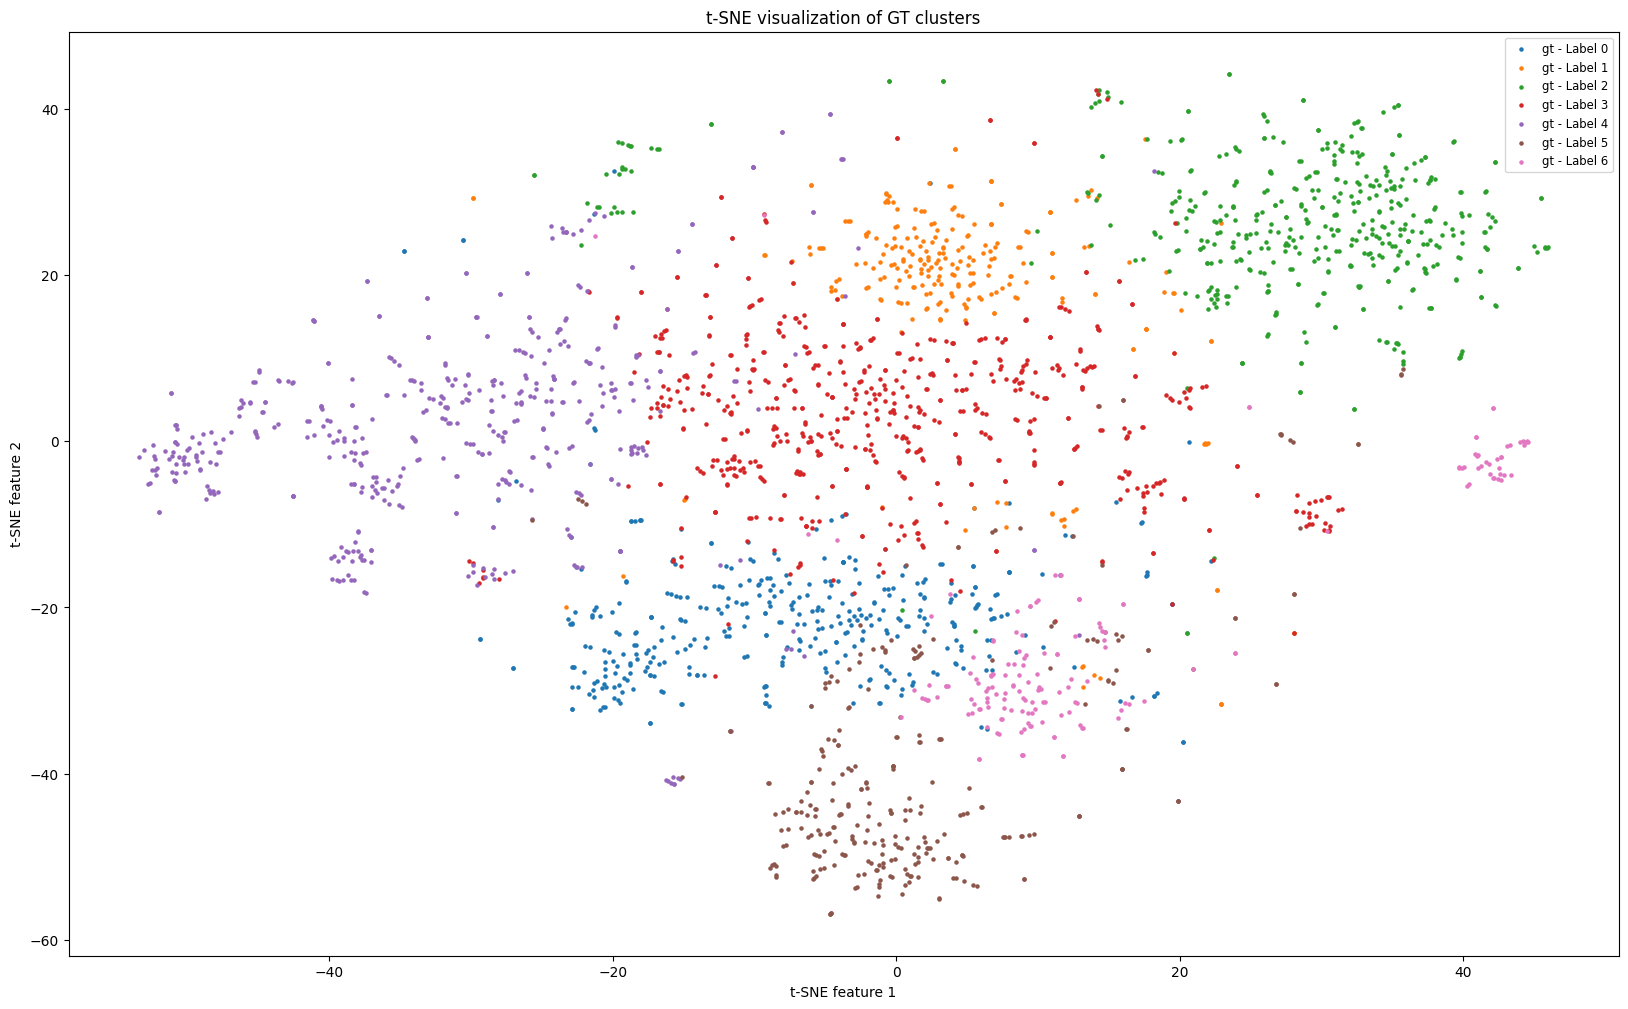

In [ ]:
plt.figure(figsize=(20, 12))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
'#ac2f75',
'#c043fb',
'#c36709',
'#d315f2',
'#245746',
'#d8588c',
'#3ac1e6',
'#2757ae',
'#5851a5',
'#194d48',
'#099473',
'#d0f3c5',
'#fe4faf',
'#c05263',
'#d8b1f3',
'#1d9393',
'#8ea720',
'#c109b9',
'#7f201f',
'#caf497',]

unique_labels = np.unique(cora_lables)  # Get all unique assigned labels

for i in unique_labels:  # Iterate through each unique label
    # Plot real data
    plt.scatter(tsne_results[cora_lables == i, 0], tsne_results[cora_lables == i, 1], 
                color=colors[i % len(colors)], label=f'gt - Label {i}', s=5)



plt.legend(fontsize='small')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of GT clusters')
plt.show()